<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
import taiko as tk
from taiko.model import *
from taiko.play import *
from taiko.performance import *

import lightgbm as lgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import posixpath

sns.set(font_scale=1.5)

Using TensorFlow backend.


In [3]:
lgbm = LGBM()

100%|██████████| 12/12 [00:00<00:00, 83.78it/s]

aaaaa
carolyn
cuxi
fatfat
eve
oliver
chris
sheep
howeverover
celiven
john
kdchang


In [3]:
lgbm.pre_train()

100%|██████████| 12/12 [00:00<00:00, 81.53it/s]


aaaaa
carolyn
cuxi
fatfat
eve
oliver
chris
sheep
howeverover
celiven
john
kdchang
Training until validation scores don't improve for 100 rounds.
[5]	valid_0's f1-score: 0.78888
[10]	valid_0's f1-score: 0.828298
[15]	valid_0's f1-score: 0.848391
[20]	valid_0's f1-score: 0.864515
[25]	valid_0's f1-score: 0.878113
[30]	valid_0's f1-score: 0.894623
[35]	valid_0's f1-score: 0.905515
[40]	valid_0's f1-score: 0.914798
[45]	valid_0's f1-score: 0.917913
[50]	valid_0's f1-score: 0.9221
[55]	valid_0's f1-score: 0.92594
[60]	valid_0's f1-score: 0.931256
[65]	valid_0's f1-score: 0.934974
[70]	valid_0's f1-score: 0.937112
[75]	valid_0's f1-score: 0.940329
[80]	valid_0's f1-score: 0.939591
[85]	valid_0's f1-score: 0.941949
[90]	valid_0's f1-score: 0.943724
[95]	valid_0's f1-score: 0.946338
[100]	valid_0's f1-score: 0.947512
             precision    recall  f1-score   support

          0       0.96      0.96      0.96       284
          1       0.95      0.96      0.96       931
          2       0

Training until validation scores don't improve for 100 rounds.
[5]	valid_0's f1-score: 0.817656
[10]	valid_0's f1-score: 0.840886
[15]	valid_0's f1-score: 0.861442
[20]	valid_0's f1-score: 0.875243
[25]	valid_0's f1-score: 0.885697
[30]	valid_0's f1-score: 0.895006
[35]	valid_0's f1-score: 0.906675
[40]	valid_0's f1-score: 0.915569
[45]	valid_0's f1-score: 0.919991
[50]	valid_0's f1-score: 0.924721
[55]	valid_0's f1-score: 0.930064
[60]	valid_0's f1-score: 0.931483
[65]	valid_0's f1-score: 0.935675
[70]	valid_0's f1-score: 0.940175
[75]	valid_0's f1-score: 0.941511
[80]	valid_0's f1-score: 0.944379
[85]	valid_0's f1-score: 0.946054
[90]	valid_0's f1-score: 0.947911
[95]	valid_0's f1-score: 0.948079
[100]	valid_0's f1-score: 0.948122
             precision    recall  f1-score   support

          0       0.97      0.98      0.98       283
          1       0.95      0.96      0.96       932
          2       0.97      0.95      0.96       935
          3       0.90      0.90      0.90  

In [4]:
record_files = glob('../data/alpha/*/*/record_table.csv')
record_dfs = []
for record_file_path in record_files:
    record_df = pd.read_csv(record_file_path)
    record_dfs.append(record_df)
record_df = pd.concat(record_dfs, ignore_index=True)

record_df = record_df[(record_df['song_id'] >= 1) & (record_df['song_id'] <= 4)]
record_df

,drummer_name,song_id,left_sensor_datetime,right_sensor_datetime,capture_datetime
1,aaaaa,1,L_2018-09-28_111304.csv,R_2018-09-28_111305.csv,capture_2018_09_28_11_13_05
2,aaaaa,2,L_2018-09-28_111610.csv,R_2018-09-28_111611.csv,capture_2018_09_28_11_16_11
3,aaaaa,3,L_2018-09-28_111936.csv,R_2018-09-28_111937.csv,capture_2018_09_28_11_19_37
4,aaaaa,4,L_2018-09-28_112353.csv,R_2018-09-28_112355.csv,capture_2018_09_28_11_23_55
5,aaaaa,1,L_2018-09-28_112912.csv,R_2018-09-28_112913.csv,capture_2018_09_28_11_29_13
6,aaaaa,2,L_2018-09-28_113242.csv,R_2018-09-28_113244.csv,capture_2018_09_28_11_32_44
7,aaaaa,3,L_2018-09-28_113531.csv,R_2018-09-28_113532.csv,capture_2018_09_28_11_35_32
8,aaaaa,4,L_2018-09-28_113909.csv,R_2018-09-28_113910.csv,capture_2018_09_28_11_39_10
9,aaaaa,1,L_2018-09-28_114340.csv,R_2018-09-28_114340.csv,capture_2018_09_28_11_43_41
10,aaaaa,2,L_2018-09-28_114710.csv,R_2018-09-28_114713.csv,capture_2018_09_28_11_47_13


In [5]:
record_row = record_df.loc[1]
play = get_play(record_row)
pf = get_performance(play)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [6]:
x = pf.drop('timestamp', axis=1)
ts = pf['timestamp']
pf

,timestamp,L_A_AI,R_A_AI,L_G_AI,R_G_AI,L_AX_AI,R_AX_AI,L_AY_AI,R_AY_AI,L_AZ_AI,...,L_AYZ_CORR,R_AYZ_CORR,L_AZX_CORR,R_AZX_CORR,L_GXY_CORR,R_GXY_CORR,L_GYZ_CORR,R_GYZ_CORR,L_GZX_CORR,R_GZX_CORR
0,1.538104e+09,0.973814,3.982235,0.377618,-0.240975,0.858194,-2.119744,-3.175053,0.650314,1.476787,...,0.0,0.05,0.10,0.00,-0.565267,0.152725,0.204718,0.946010,-0.640622,-0.383012
1,1.538104e+09,1.076400,6.032547,0.360910,-0.219474,0.979701,-2.713607,-4.825141,0.215442,1.560086,...,0.0,0.00,0.00,0.00,-0.589603,0.250702,0.067230,0.609646,-0.012609,-0.675130
2,1.538104e+09,1.600015,15.892392,0.857018,-0.587276,0.679680,-8.854352,-11.406564,-3.851021,2.338073,...,0.0,0.05,0.00,0.00,-0.635117,-0.192691,0.398353,-0.496875,-0.550486,0.643801
3,1.538104e+09,1.544636,32.932461,0.984406,-0.749398,-0.006668,-21.561467,-9.309489,-16.765456,2.273940,...,0.0,0.15,0.10,0.00,0.552098,0.766777,0.896463,0.560402,-0.524790,-0.882665
4,1.538104e+09,1.239041,43.146582,0.329548,0.331975,0.206771,-33.694341,2.763723,-21.538107,1.760760,...,0.0,0.10,0.10,0.00,0.414760,0.412054,0.262096,0.941090,-0.361100,-0.533804
5,1.538104e+09,1.740511,41.633456,-0.168082,1.479443,0.824838,-38.198839,4.432825,-8.727126,2.589273,...,0.0,0.00,0.00,0.00,0.276520,0.174792,0.537961,0.975159,-0.161542,-0.254684
6,1.538104e+09,2.057700,40.089063,-0.188852,1.681396,1.067799,-33.384839,-8.778239,7.687977,3.163437,...,0.0,0.00,0.00,0.00,-0.815746,-0.453164,0.604197,0.915954,0.800478,0.697390
7,1.538104e+09,1.872287,35.823109,-0.149570,1.478562,1.039340,-24.444774,-16.824705,16.593309,2.921948,...,0.0,0.00,0.05,0.00,-0.487489,-0.096392,-0.110347,0.915480,0.505139,0.534291
8,1.538104e+09,1.610091,36.647668,-0.236021,1.258946,0.798017,-16.622670,-22.831474,21.329787,2.523880,...,0.0,0.00,0.10,0.05,-0.238839,0.422099,-0.827804,0.905925,-0.450765,-0.167403
9,1.538104e+09,1.283942,36.518355,-0.042457,1.034628,0.517290,-13.439624,-15.880129,25.357354,1.966174,...,0.0,0.00,0.05,0.00,0.852175,0.209735,0.056107,0.975378,-0.888449,-0.886447


In [7]:
pred_df = pd.DataFrame(data={
    'timestamp': ts,
    'hit_type': lgbm.predict(x)
})
pred_df

,timestamp,hit_type
0,1.538104e+09,0
1,1.538104e+09,0
2,1.538104e+09,1
3,1.538104e+09,1
4,1.538104e+09,1
5,1.538104e+09,3
6,1.538104e+09,3
7,1.538104e+09,3
8,1.538104e+09,3
9,1.538104e+09,0


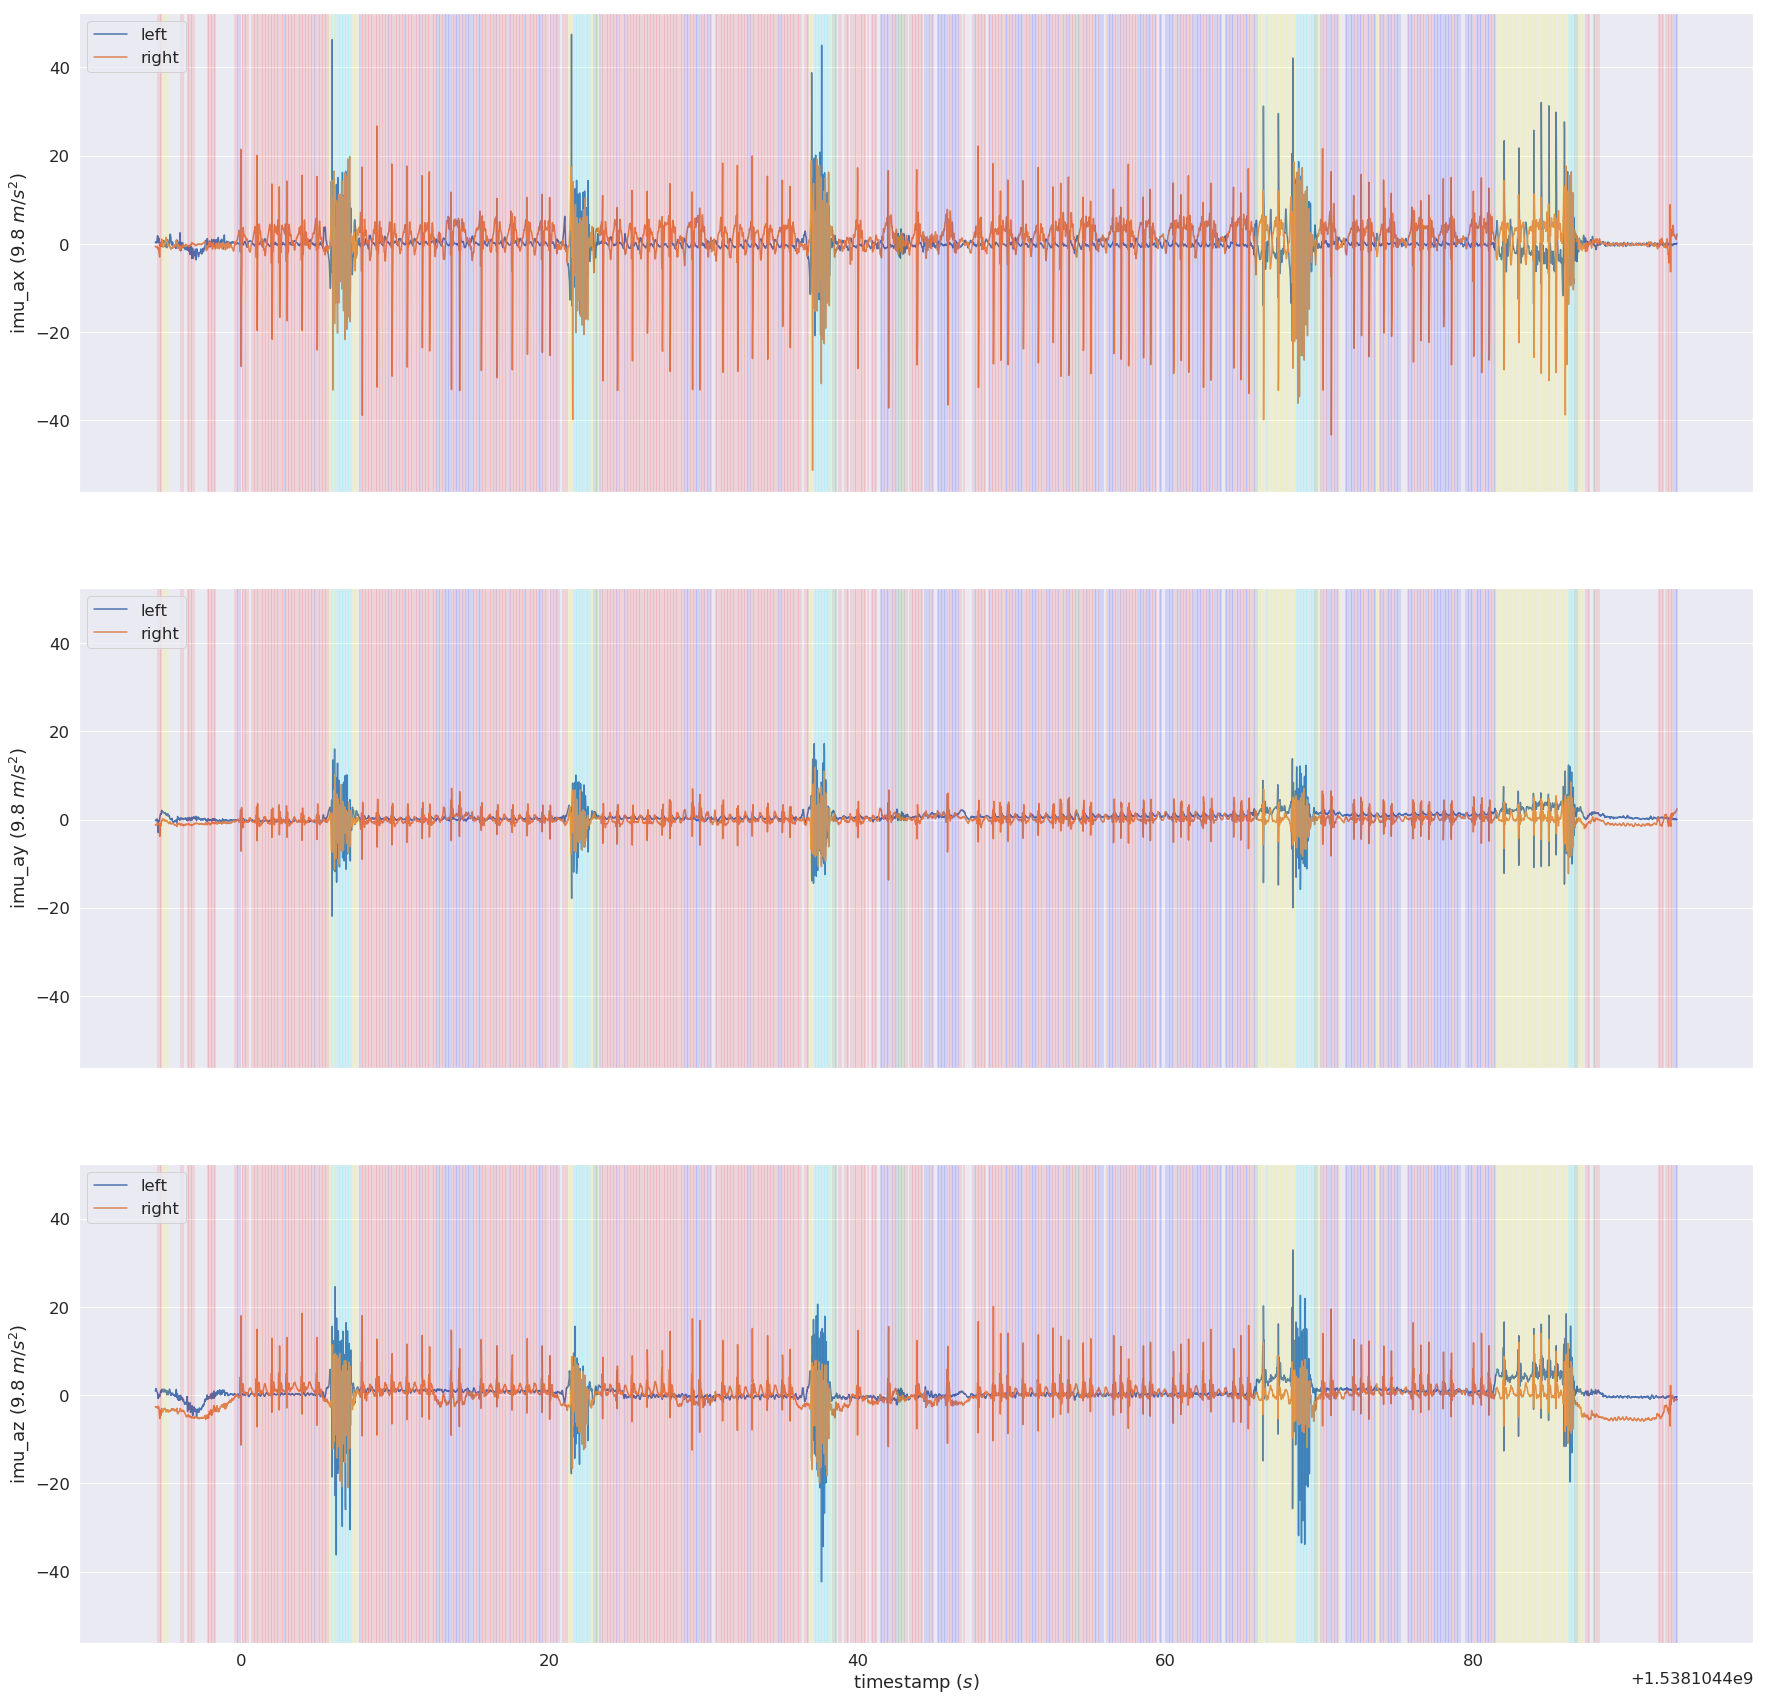

In [8]:
show_cols = tk.ZERO_ADJ_COL[:3]
fig, axes = plt.subplots(nrows=len(show_cols), ncols=1, sharex=True, sharey=True, figsize=(30, 30))
start_time = pred_df['timestamp'].iloc[0]
end_time = pred_df['timestamp'].iloc[-1]

left_df = play.play_dict['L']
left_df = left_df[(left_df['timestamp'] >= start_time) & (left_df['timestamp'] <= end_time)]

right_df = play.play_dict['R']
right_df = right_df[(right_df['timestamp'] >= start_time) & (right_df['timestamp'] <= end_time)]

for i_, col in enumerate(show_cols):
    sns.lineplot(data=left_df, x='timestamp', y=col, label='left', ax=axes[i_])
    sns.lineplot(data=right_df, x='timestamp', y=col, label='right', ax=axes[i_])
    axes[i_].set_ylabel(col + ' $(9.8\ m/s^2)$')
    for row_ in pred_df.values:
        event_time = float(row_[0])
        hit_type = int(row_[1])
        if hit_type > 0:
            axes[i_].axvline(event_time, color=tk.COLORS[hit_type], alpha=1, lw=0.2)
plt.xlabel('timestamp $(s)$')
plt.show()

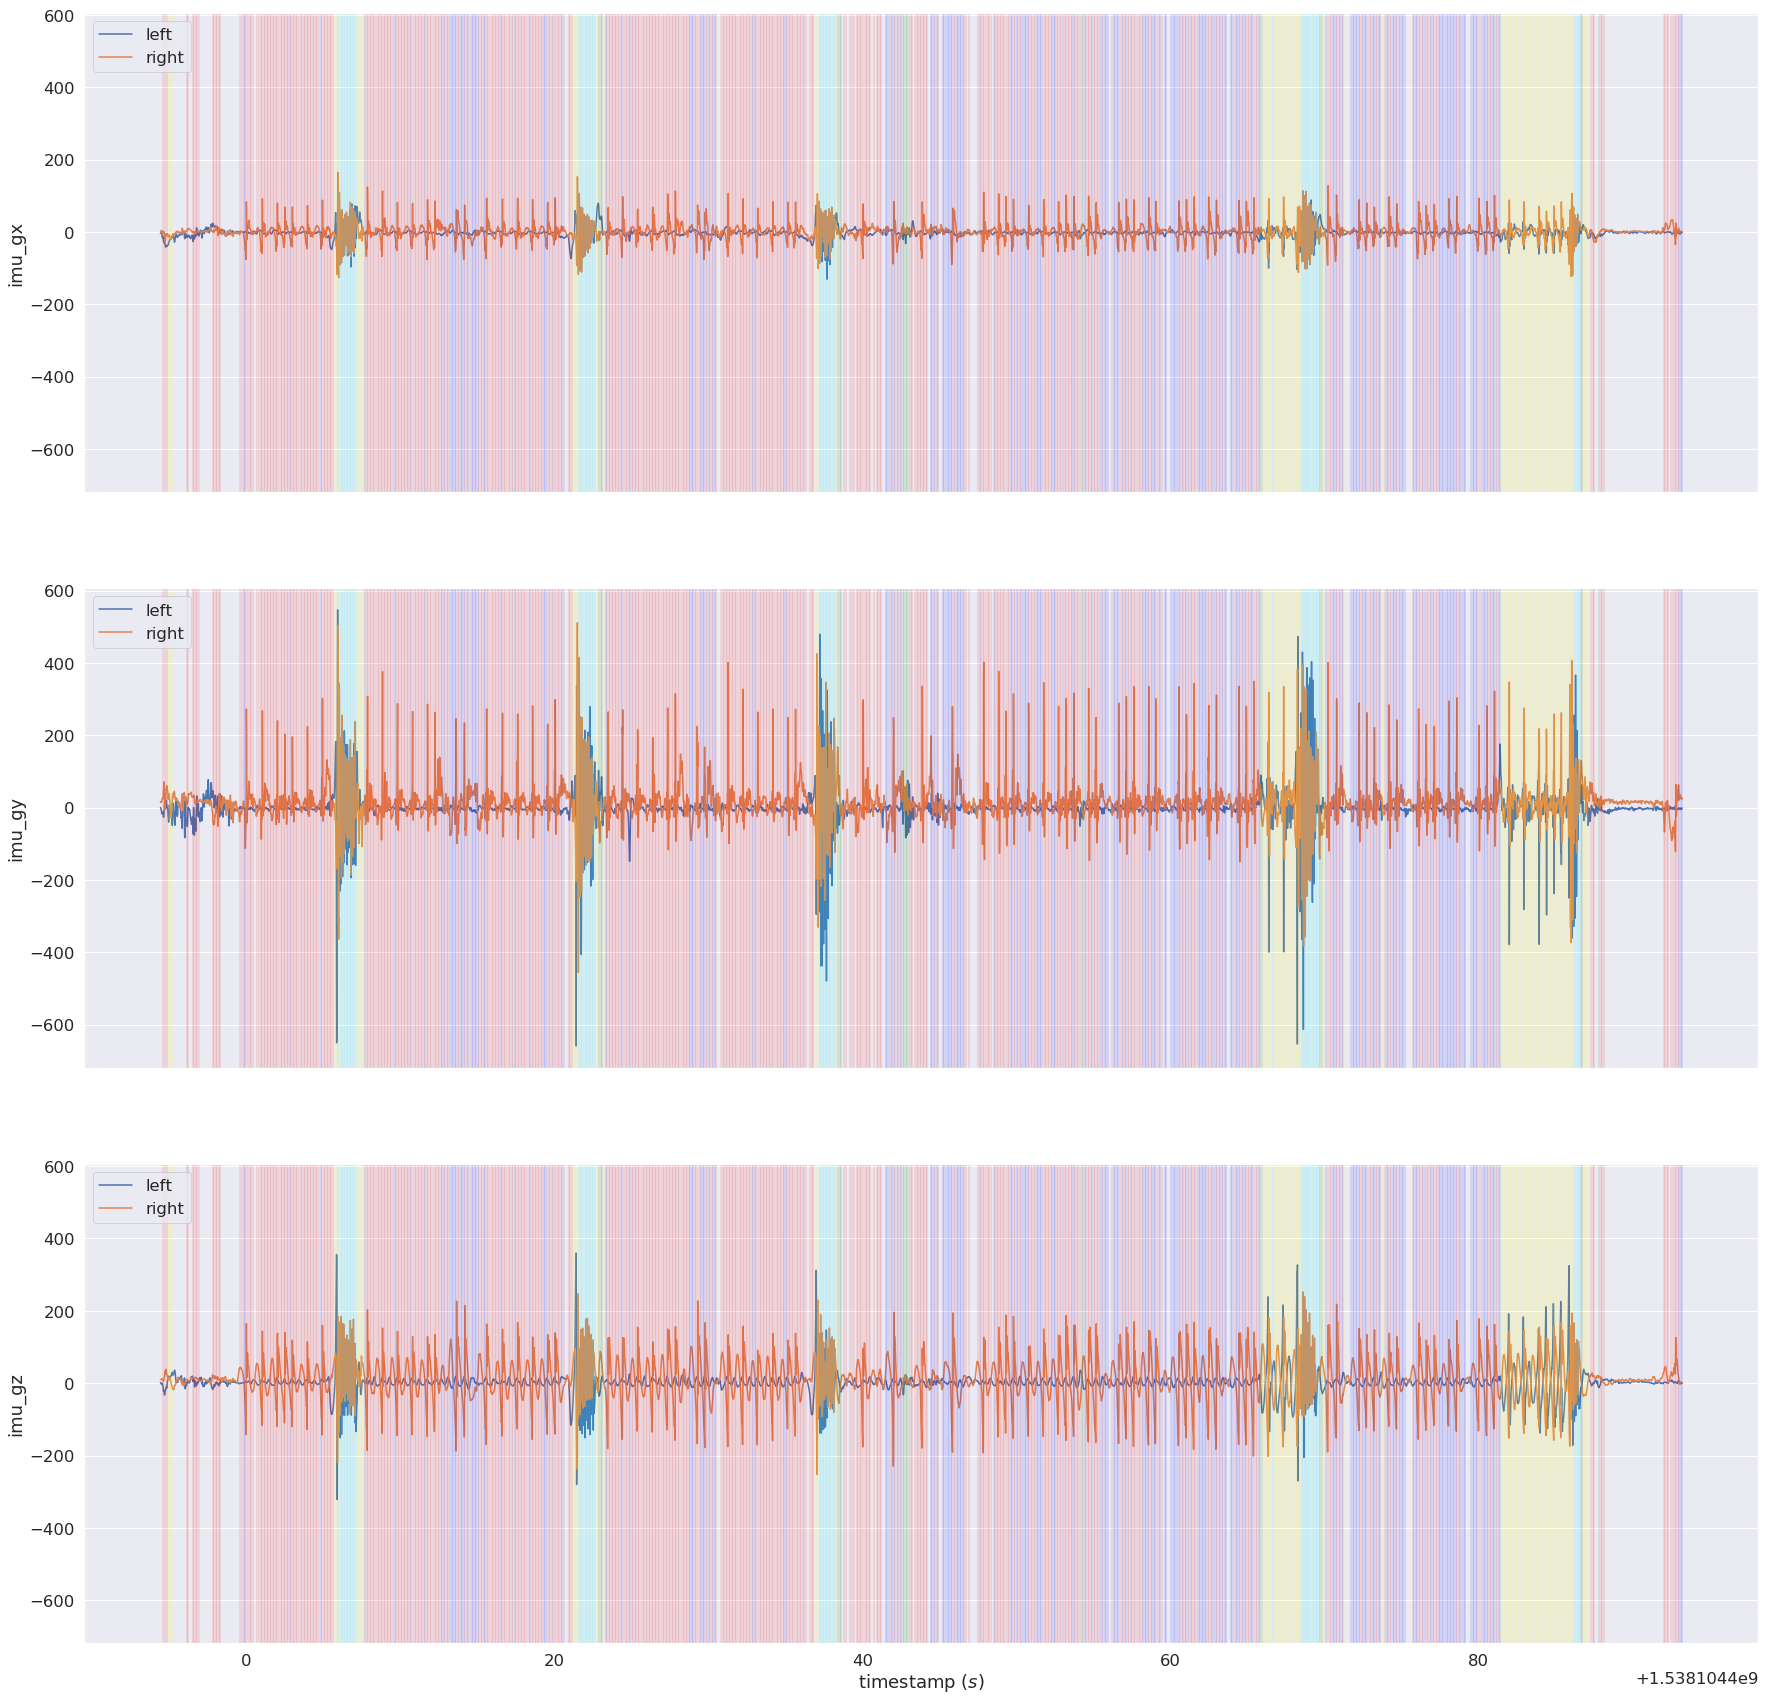

In [9]:
show_cols = tk.ZERO_ADJ_COL[3:6]
fig, axes = plt.subplots(nrows=len(show_cols), ncols=1, sharex=True, sharey=True, figsize=(30, 30))
start_time = pred_df['timestamp'].iloc[0]
end_time = pred_df['timestamp'].iloc[-1]

left_df = play.play_dict['L']
left_df = left_df[(left_df['timestamp'] >= start_time) & (left_df['timestamp'] <= end_time)]

right_df = play.play_dict['R']
right_df = right_df[(right_df['timestamp'] >= start_time) & (right_df['timestamp'] <= end_time)]

for i_, col in enumerate(show_cols):
    sns.lineplot(data=left_df, x='timestamp', y=col, label='left', ax=axes[i_])
    sns.lineplot(data=right_df, x='timestamp', y=col, label='right', ax=axes[i_])
    axes[i_].set_ylabel(col)
    for row_ in pred_df.values:
        event_time = float(row_[0])
        hit_type = int(row_[1])
        if hit_type > 0:
            axes[i_].axvline(event_time, color=tk.COLORS[hit_type], alpha=1, lw=0.2)
plt.xlabel('timestamp $(s)$')
plt.show()